In [0]:
import torch
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [0]:
inputs = torch.rand(1,1,64,64)

In [3]:
inputs

tensor([[[[0.9185, 0.6781, 0.9990,  ..., 0.9336, 0.1533, 0.5972],
          [0.6583, 0.2660, 0.1666,  ..., 0.0329, 0.9626, 0.3087],
          [0.7044, 0.8380, 0.4594,  ..., 0.0077, 0.7631, 0.8393],
          ...,
          [0.2946, 0.7941, 0.0054,  ..., 0.4647, 0.0446, 0.4784],
          [0.4855, 0.9234, 0.2502,  ..., 0.7435, 0.7754, 0.0032],
          [0.1917, 0.2661, 0.4489,  ..., 0.5662, 0.4389, 0.4716]]]])

In [4]:
outputs = torch.rand(1,2)
outputs

tensor([[0.1478, 0.4020]])

In [0]:
model = torch.nn.Sequential(
   torch.nn.Linear(64,256),
   torch.nn.Linear(256,256),
   torch.nn.Linear(256,2)
)

In [10]:
result = model(inputs)
result

tensor([[[[-5.0525e-02, -1.2240e-01],
          [ 3.6981e-02, -1.2547e-01],
          [ 5.8408e-02, -1.2245e-01],
          [ 7.0527e-02, -3.9395e-03],
          [-3.6483e-02, -2.3108e-01],
          [ 8.8311e-02, -1.6410e-01],
          [ 7.5305e-02, -1.4364e-01],
          [ 8.5206e-02, -2.3335e-01],
          [-8.9446e-03, -5.3814e-02],
          [ 1.7663e-03, -1.8261e-01],
          [ 4.0477e-02, -8.9860e-02],
          [-6.6152e-02, -2.3880e-01],
          [ 1.3637e-02, -1.6606e-01],
          [ 1.7099e-03, -1.6510e-01],
          [ 1.1932e-01, -9.7050e-02],
          [ 5.5436e-02, -4.0126e-02],
          [ 1.7129e-02, -1.9654e-01],
          [ 2.4619e-02, -1.2540e-01],
          [ 3.6333e-02, -1.4166e-01],
          [-7.2794e-02, -5.6326e-02],
          [ 2.6092e-02, -1.4242e-01],
          [-2.6394e-02, -5.7179e-02],
          [-2.0374e-02, -2.3849e-01],
          [ 2.5805e-03, -1.8572e-01],
          [ 2.9408e-02, -1.2392e-01],
          [-7.2017e-02, -1.7707e-01],
          [-

In [11]:
result.shape

torch.Size([1, 1, 64, 2])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  """Entry point for launching an IPython kernel.


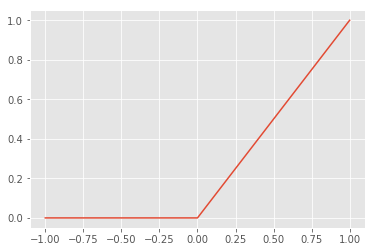

In [13]:
x = torch.range(-1,1,0.1)
y = torch.nn.functional.relu(x)
plt.plot(x.numpy(),y.numpy())

In [0]:
model = torch.nn.Sequential(
 torch.nn.Linear(64,256),
 torch.nn.ReLU(),
 torch.nn.Linear(256,256),
 torch.nn.ReLU(),
 torch.nn.Linear(256,2)
)

In [0]:
results = model(inputs)

In [17]:
loss = torch.nn.MSELoss()(results,outputs)
loss

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([1, 1, 64, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.0491, grad_fn=<MseLossBackward>)

In [19]:
test_results = model(inputs)
test_results

tensor([[[[-0.0053,  0.0761],
          [ 0.0234,  0.1756],
          [-0.0210,  0.1225],
          [-0.0100,  0.1197],
          [ 0.0190,  0.1426],
          [ 0.0106,  0.1299],
          [-0.0248,  0.1000],
          [-0.0121,  0.1059],
          [ 0.0261,  0.1047],
          [-0.0258,  0.1217],
          [-0.0030,  0.1343],
          [ 0.0305,  0.1616],
          [ 0.0380,  0.0787],
          [ 0.0188,  0.1310],
          [ 0.0140,  0.1587],
          [-0.0019,  0.1092],
          [-0.0056,  0.1182],
          [ 0.0294,  0.1155],
          [-0.0002,  0.1010],
          [ 0.0337,  0.1239],
          [ 0.0262,  0.1383],
          [ 0.0180,  0.0812],
          [ 0.0127,  0.1245],
          [ 0.0622,  0.1343],
          [ 0.0195,  0.1313],
          [ 0.0442,  0.1609],
          [ 0.0323,  0.1161],
          [ 0.0240,  0.1599],
          [ 0.0125,  0.1134],
          [ 0.0355,  0.0824],
          [ 0.0096,  0.1327],
          [-0.0271,  0.1246],
          [-0.0023,  0.1487],
          

In [21]:
loss = torch.nn.MSELoss()(test_results,outputs)
loss

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([1, 1, 64, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.0491, grad_fn=<MseLossBackward>)

In [0]:
model.zero_grad()
loss.backward()

In [0]:
learning_rate  = 0.001
for parameter in model.parameters():
  parameter.data -= parameter.grad.data*learning_rate

In [0]:
after_learning = model(inputs)

In [26]:
loss_after_learning = torch.nn.MSELoss()(after_learning,outputs)
loss_after_learning

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([1, 1, 64, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.0486, grad_fn=<MseLossBackward>)